# Paper Citations Over Time

In [17]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

def get_citation_data(paper_id):
    # Search for the paper on Semantic Scholar
    # Documentation: https://api.semanticscholar.org/api-docs/graph#tag/Paper-Data/operation/get_graph_get_paper_citations
    url = f'https://api.semanticscholar.org/graph/v1/paper/{paper_id}/citations?fields=title,year,authors,citationCount,isInfluential&limit=1000'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Failed to retrieve paper data. Status code: {response.status_code}")
        return None

# Get data about all the papers that cited the given paper
citation_data = get_citation_data(paper_id="CorpusID:233296808")['data']

In [ ]:
# Convert json to three sperate dictioniories that contain the count of citations
influential_count = {}
noninfluential_count = {}
total_count = {}
for citing_paper in citation_data:
    year = citing_paper['citingPaper']['year']
    is_influential = citing_paper['isInfluential']
    try:
        total_count[year] += 1
    except KeyError:
        total_count[year] = 0
    if is_influential:
        try:
            influential_count[year] += 1
        except KeyError:
            influential_count[year] = 0
    else:
        try:
            noninfluential_count[year] += 1
        except KeyError:
            noninfluential_count[year] = 0

# Remove unwanted keys from dicts
for counter_dict in influential_count, noninfluential_count, total_count:
    for drop_key in [2020, None]:
        if drop_key in counter_dict.keys():
            counter_dict.pop(drop_key)

234


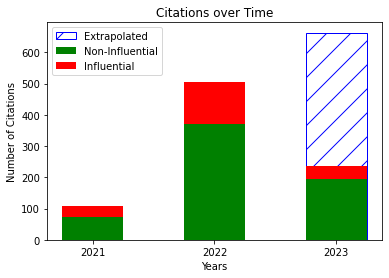

In [73]:
# Get time until the end of the year
f_date = date.today()
l_date = date(2023, 12, 31)
delta = l_date - f_date
print(delta.days)

years = [2023, 2022, 2021]
weight_counts = {
    "Non-Influential": [count for _, count in noninfluential_count.items()],
    "Influential": [count for _, count in influential_count.items()],
}

# Create the Barplot
width = 0.5
fig, ax = plt.subplots()
bottom = np.array([0,0,0])
extrapolated_number = int(total_count[2023]/((365-float(delta.days))/365))
p = ax.bar(years, [extrapolated_number,0,0], width, label='Extrapolated', bottom=0, color='white', edgecolor='blue', hatch="/")
p = ax.bar(years, weight_counts["Non-Influential"], width, label='Non-Influential', bottom=[0,0,0], color='green')
p = ax.bar(years, weight_counts["Influential"], width, label='Influential', bottom=weight_counts['Non-Influential'],color='red')
ax.set_title("Citations over Time")
ax.legend(loc="upper left")
ax.xaxis.set_ticks(np.arange(2021, 2024, 1.0))

plt.xlabel("Years")
plt.ylabel("Number of Citations")
plt.show()
#fig.savefig("citations_over_time.svg", format="svg", dpi=1200)
#fig.savefig("citations_over_time.png", format="png", dpi=1200)
